# App Sequences based on apps
In this notebook we 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("names_with_app_clusters.csv")

In [3]:
data=data.drop(columns=['cluster'])

In [4]:
data["next_app"]=data.groupby(["user_id","session"]).package_name.shift(-1)

In [5]:
data=data.merge(data.groupby(["user_id","session"]).agg({"package_name":"size"}).rename(columns={"package_name":"session_length"}).reset_index(),on=['user_id','session'])

In [6]:
data=data[data.session_length>1]

In [7]:
data.groupby(['package_name']).size()[data.groupby('package_name').size().max()==data.groupby('package_name').size()]

package_name
com.facebook.katana    26575175
dtype: int64

In [7]:
sessions_start_facebook=data.set_index(["user_id","session"]).loc[data[(data.package_name=='com.facebook.katana')&(data.session!=data.groupby(["user_id"]).session.shift(1))].set_index(["user_id","session"]).index]

In [2]:
sessions_start_facebook=pd.read_csv("sessions_start_facebook.csv")

In [3]:
sessions_start_facebook

,user_id,session,package_name,next_app,session_length
0,0,0,com.facebook.katana,com.android.chrome,7
1,0,0,com.android.chrome,com.google.android.apps.photos,7
2,0,0,com.google.android.apps.photos,com.facebook.katana,7
3,0,0,com.facebook.katana,com.whatsapp,7
4,0,0,com.whatsapp,com.google.android.youtube,7
...,...,...,...,...,...
26754848,9999,5641,com.whatsapp,NaN,4
26754849,9999,5642,com.facebook.katana,com.snapchat.android,4
26754850,9999,5642,com.snapchat.android,com.instagram.android,4
26754851,9999,5642,com.instagram.android,com.facebook.katana,4


Now that we have the sessions that begin with the most frequent app (Facebook), we can take a look at which apps come next.

In [4]:
sessions_start_facebook["position in sequence"]=1

In [12]:
sessions_start_facebook["position in sequence"]=sessions_start_facebook.groupby(['user_id','session'])["position in sequence"].cumsum()

In [16]:
sessions_start_facebook.to_csv("sessions_start_facebook.csv")

sessions_start_facebook.groupby(["position in sequence"]).package_name.nunique()

In [4]:
sessions_start_facebook=sessions_start_facebook.drop(columns=['Unnamed: 0'])

In [5]:
sessions_start_facebook[sessions_start_facebook["position in sequence"]==312]

,user_id,session,package_name,next_app,session_length,position in sequence
3378779,1274,4401,com.whatsapp,NaN,312,312


Before we start to look closer at the sequences we take a look at how the sessions are distributed. Below we can see that while there are more sessions of a shorter lengthh, there are still over hudred of the longest one, indicating we have enough information to look at even the longest ones.

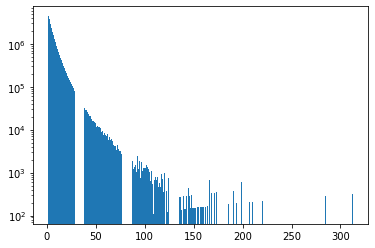

In [13]:
plt.bar(sessions_start_facebook.groupby('session_length').package_name.size().index,sessions_start_facebook.groupby('session_length').package_name.size().values)
plt.yscale('log')
plt.show()

Below it can be observed that for the longest sessions, even there serveral of them, they are all for the samme user.

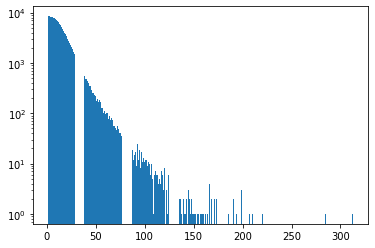

In [18]:
plt.bar(sessions_start_facebook.groupby('session_length').user_id.nunique().index,sessions_start_facebook.groupby('session_length').user_id.nunique().values)
plt.yscale('log')
plt.show()

In [29]:
print("number of different apps in second position:",sessions_start_facebook[sessions_start_facebook['position in sequence']==2].package_name.nunique())

number of different apps in second position: 16860


In [28]:
(sessions_start_facebook[sessions_start_facebook['position in sequence']==2].groupby(['package_name']).session.size()/sessions_start_facebook[sessions_start_facebook['position in sequence']==2].shape[0]*100).sort_values(ascending=False).cumsum().head(20)

package_name
com.facebook.orca                           12.465395
com.whatsapp                                23.037991
com.android.chrome                          31.903474
com.google.android.googlequicksearchbox     39.226893
com.sonyericsson.conversations              45.698446
com.instagram.android                       51.401126
com.snapchat.android                        54.910879
com.sonymobile.email                        58.123037
com.google.android.gm                       61.045534
com.sonyericsson.album                      63.592978
com.twitter.android                         65.792638
com.google.android.youtube                  67.719423
com.google.android.apps.maps                69.169745
com.android.incallui                        70.351192
com.microsoft.office.outlook                71.491801
com.yahoo.mobile.client.android.mail        72.528801
com.sonyericsson.android.socialphonebook    73.476892
com.ebay.mobile                             74.348975
bbc.mobile.news

So while there is more than 16000 different apps that are second in the secuences more than 50% of the cases can be described with the six apps.

In [30]:
print("number of different apps in thrid position:",sessions_start_facebook[sessions_start_facebook['position in sequence']==3].package_name.nunique())

(sessions_start_facebook[sessions_start_facebook['position in sequence']==3].groupby(['package_name']).session.size()/sessions_start_facebook[sessions_start_facebook['position in sequence']==3].shape[0]*100).sort_values(ascending=False).cumsum().head(20)

number of different apps in thrid position: 14662


package_name
com.facebook.katana                         29.057969
com.android.chrome                          40.118423
com.whatsapp                                45.245488
com.google.android.googlequicksearchbox     49.641369
com.facebook.orca                           53.949484
com.instagram.android                       57.996972
com.sonyericsson.conversations              61.322363
com.snapchat.android                        63.807984
com.google.android.gm                       65.951897
com.sonymobile.email                        68.060223
com.sonyericsson.album                      69.777514
com.android.incallui                        71.427567
com.google.android.youtube                  73.029828
com.twitter.android                         74.591932
com.google.android.apps.maps                75.892509
com.sonyericsson.android.socialphonebook    76.948574
com.microsoft.office.outlook                77.833441
com.ebay.mobile                             78.518576
com.yahoo.mobil

Again we see that there is some of the same patterns that next to something there is something else.

In [32]:
sessions_start_facebook.groupby('position in sequence').package_name.nunique().sort_values(ascending=False)

position in sequence
2      16860
3      14662
4      13208
5      11853
6      10342
       ...  
288        1
287        1
286        1
256        1
312        1
Name: package_name, Length: 312, dtype: int64

In [33]:
sessions_start_facebook.groupby('position in sequence').package_name.nunique().sort_values(ascending=False)[sessions_start_facebook.groupby('position in sequence').package_name.nunique().sort_values(ascending=False)==1]

position in sequence
305    1
300    1
301    1
302    1
303    1
304    1
311    1
306    1
307    1
308    1
309    1
310    1
298    1
299    1
1      1
297    1
296    1
295    1
294    1
293    1
292    1
291    1
290    1
289    1
288    1
287    1
286    1
256    1
312    1
Name: package_name, dtype: int64